In [ ]:
!pip install git+https://github.com/gumgo91/pkpy.git

  Cloning https://github.com/gumgo91/pkpy.git to /tmp/pip-req-build-yalt_cqj
  Running command git clone --filter=blob:none --quiet https://github.com/gumgo91/pkpy.git /tmp/pip-req-build-yalt_cqj
  Resolved https://github.com/gumgo91/pkpy.git to commit 5504324a48fef433d781e2db067fe7af7eff5235
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PKPy: filename=PKPy-0.1.0-py3-none-any.whl size=24921 sha256=05180ce8dce8b328a4121b9655b70f84acb283eb62022ea05905fdc5ef9615f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-6gmsearb/wheels/d5/67/de/ce73b7d62855982492b1e3d689bdf480004ae2bdd6ebfeb7c0
Successfully built PKPy



Column Classifications:
--------------------------------------------------
ID Column: Subject
Time Column: Time
Concentration Column: conc
Covariate Columns:
  - Wt
  - Dose
NCA analysis completed. Success rate: 12/12 subjects
Metrics calculated using 132 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
Ka             1.284   121.8  [0.555, 8.179]
CL             2.794    23.3  [1.627, 3.869]
V             31.732    17.8  [23.648, 41.264]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
Ka            79.8%
CL            26.3%
V             18.0%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 14.4%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.933
RMSE:             0.740
MAE:              0.428

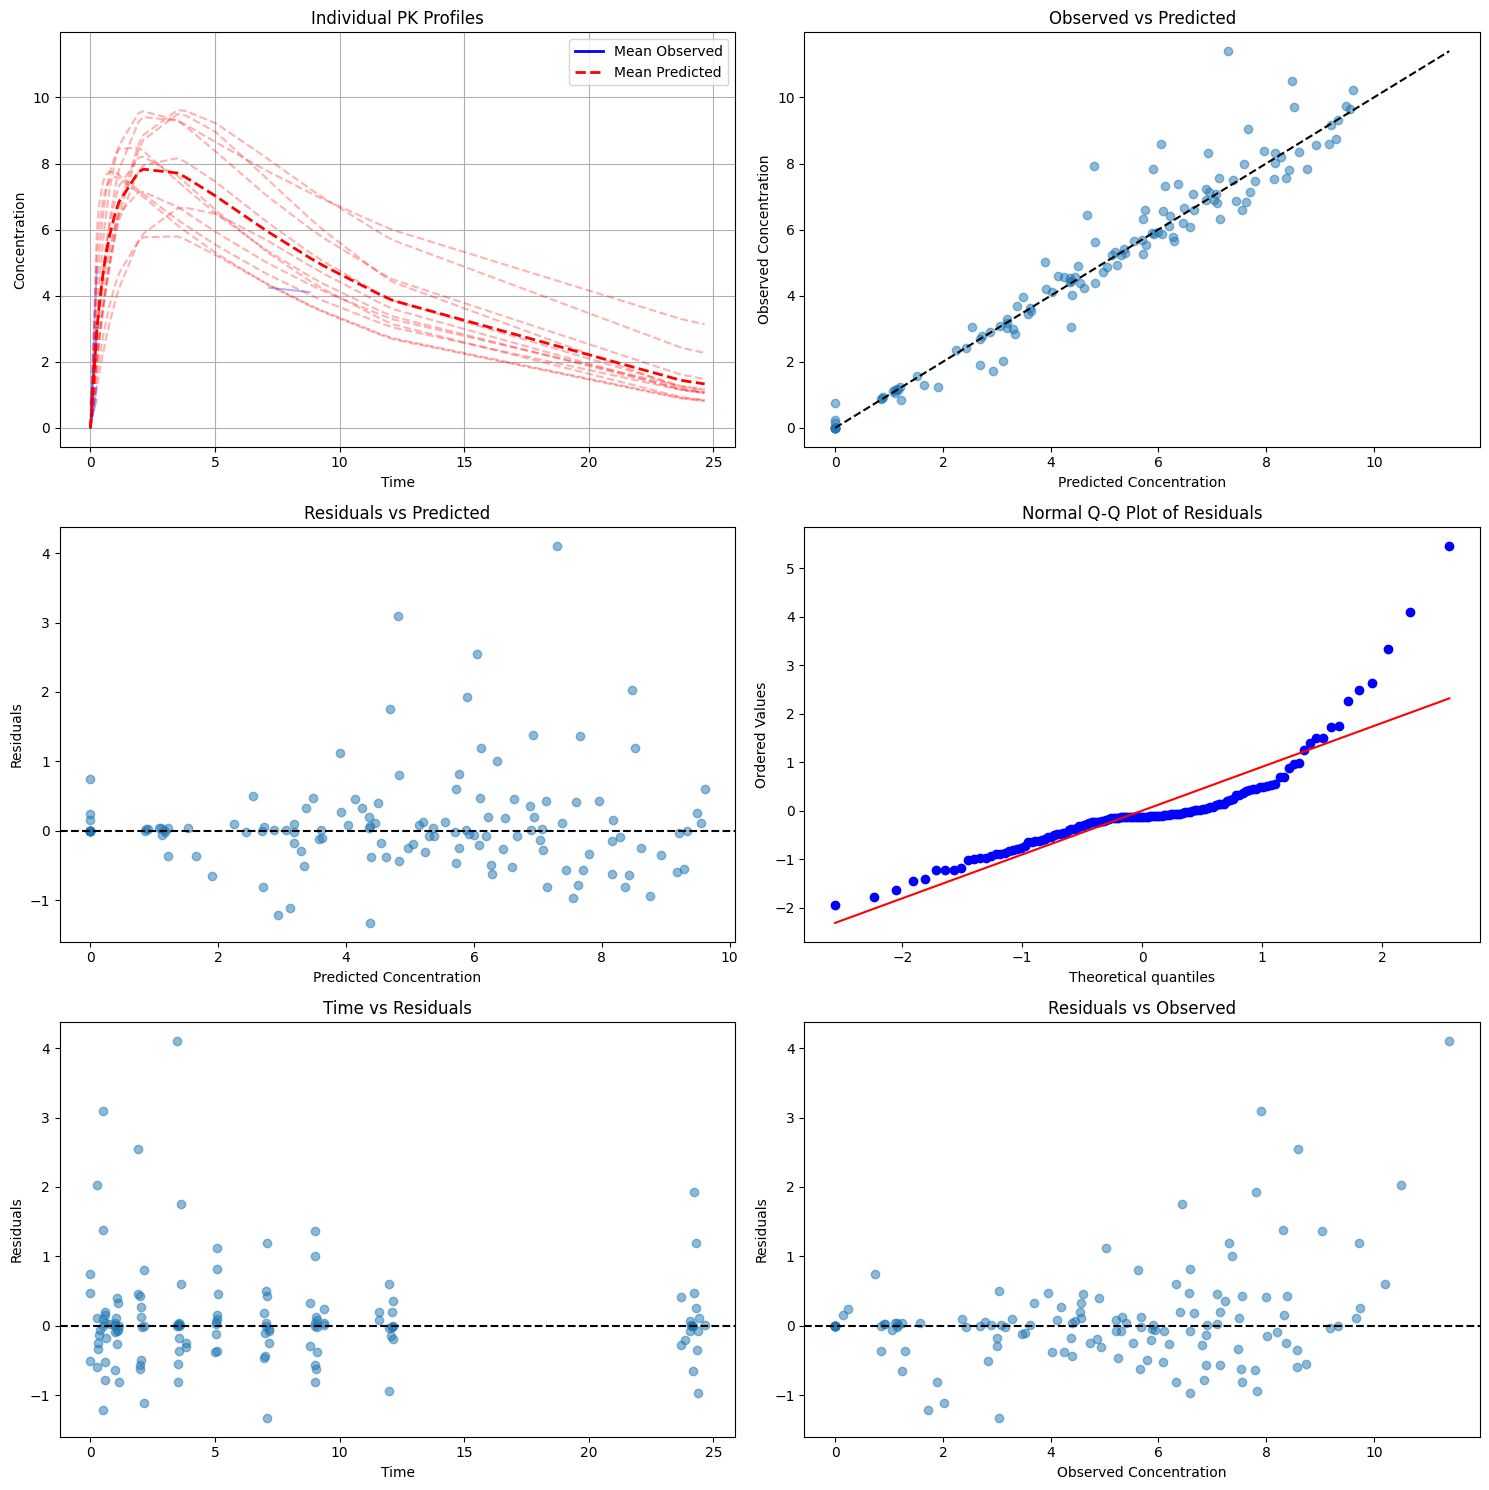

In [ ]:
from pkpy import BasePKWorkflow
from pkpy.utils import convert_data

# Theoph data conversion
files = convert_data('Theoph.csv',
                     id_col='Subject',
                     time_col='Time',
                     conc_col='conc')

# analysis
workflow = BasePKWorkflow.from_files(
    model_type='onecomp_abs',
    conc_file=files['concentrations'],
    time_file=files['times'],
    demo_file=files['demographics'],
    dose=320
)

# execute analysis
workflow.run_analysis(create_plots=True)
workflow.print_summary()
workflow.save_results('theoph_results')


Column Classifications:
--------------------------------------------------
ID Column: Subject
Time Column: Time
Concentration Column: conc
Covariate Columns:
  - Wt
  - Dose
NCA analysis completed. Success rate: 12/12 subjects
Metrics calculated using 132 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
Ka             1.284    80.5  [0.555, 4.668]
CL             2.794    23.3  [1.627, 3.869]
V             31.732    17.4  [23.649, 40.864]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
Ka            67.0%
CL            26.3%
V             17.7%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 14.4%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.933
RMSE:             0.740
MAE:              0.428

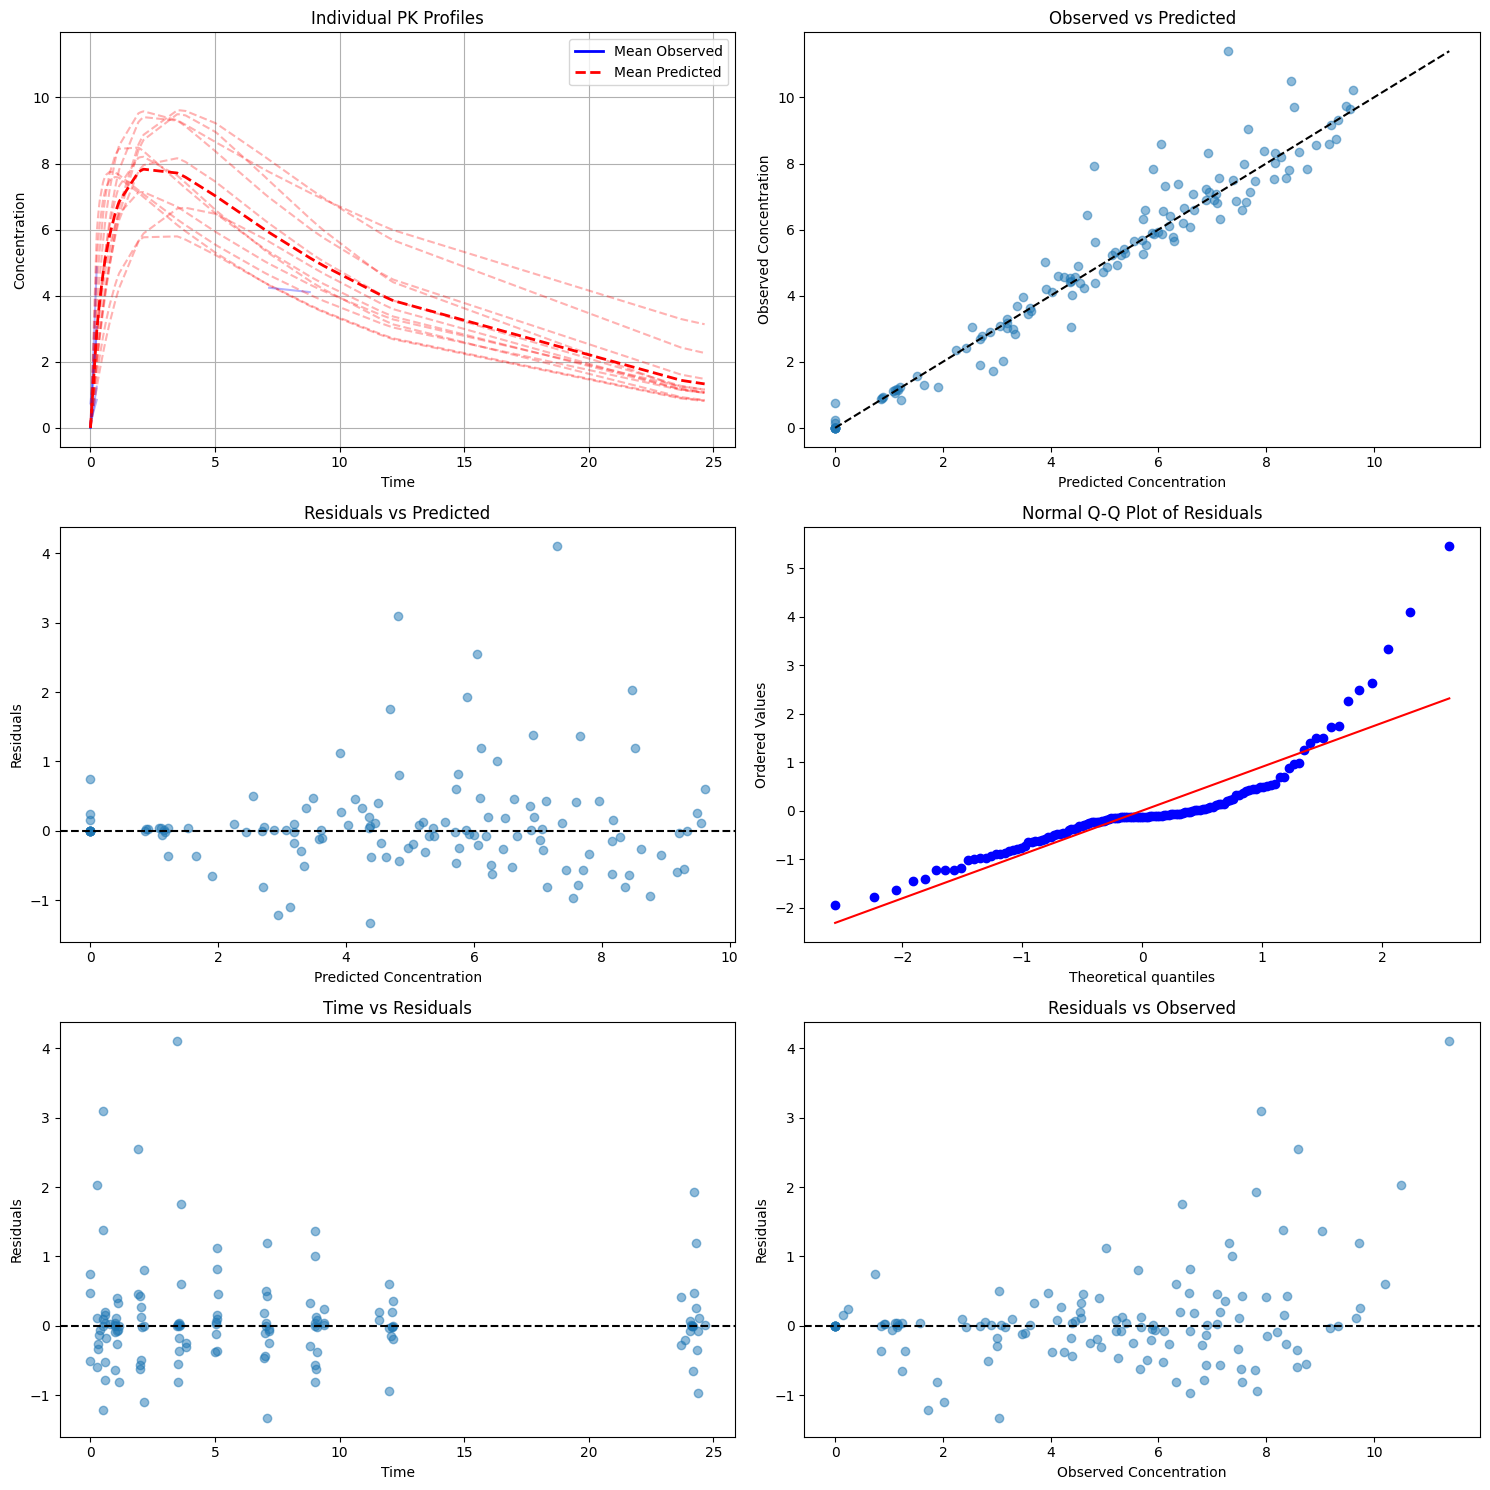

In [ ]:
from pkpy import BasePKWorkflow
from pkpy.utils import convert_data

# Theoph data conversion
files = convert_data('Theoph.csv',
                    id_col='Subject',
                    time_col='Time',
                    conc_col='conc')

# set initial parameters
initial_params = {
    'Ka': {
        'value': 1.5,
        'cv_percent': 30,
        'lower_bound': 0.1,
        'upper_bound': 5.0
    },
    'CL': {
        'value': 2.5,
        'cv_percent': 25,
        'lower_bound': 0.5,
        'upper_bound': 10.0
    },
    'V': {
        'value': 30.0,
        'cv_percent': 20,
        'lower_bound': 10.0,
        'upper_bound': 100.0
    }
}

# workflow creation and analysis
workflow = BasePKWorkflow.from_files(
    model_type='onecomp_abs',
    conc_file=files['concentrations'],
    time_file=files['times'],
    demo_file=files['demographics'],
    dose=320,
    initial_params=initial_params
)

results = workflow.run_analysis(create_plots=True)
workflow.print_summary()
workflow.print_nca_summary()
workflow.save_results('theoph_results_with_initial_params')